In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
# encoding dim은 축소된 representation vector의 크기를 말합니다.
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.3713 - val_loss: 0.2721
Epoch 2/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2660 - val_loss: 0.2565
Epoch 3/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2463 - val_loss: 0.2335
Epoch 4/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2257 - val_loss: 0.2151
Epoch 5/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2097 - val_loss: 0.2016
Epoch 6/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1980 - val_loss: 0.1915
Epoch 7/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1892 - val_loss: 0.1839
Epoch 8/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1823 - val_loss: 0.1777
Epoch 9/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.1767 - val_loss: 0.1727
Epoch

In [0]:
decoded_imgs = autoencoder.predict(x_test)

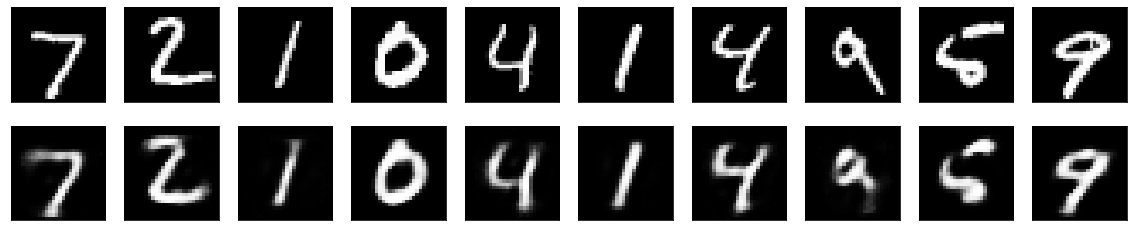

In [8]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deep autoencoder by stack dense layers

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [10]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.3479 - val_loss: 0.2635
Epoch 2/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2561 - val_loss: 0.2461
Epoch 3/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2349 - val_loss: 0.2224
Epoch 4/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.2156 - val_loss: 0.2094
Epoch 5/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.2051 - val_loss: 0.1960
Epoch 6/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1920 - val_loss: 0.1851
Epoch 7/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1831 - val_loss: 0.1780
Epoch 8/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1773 - val_loss: 0.1743
Epoch 9/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1715 - val_loss: 0.1

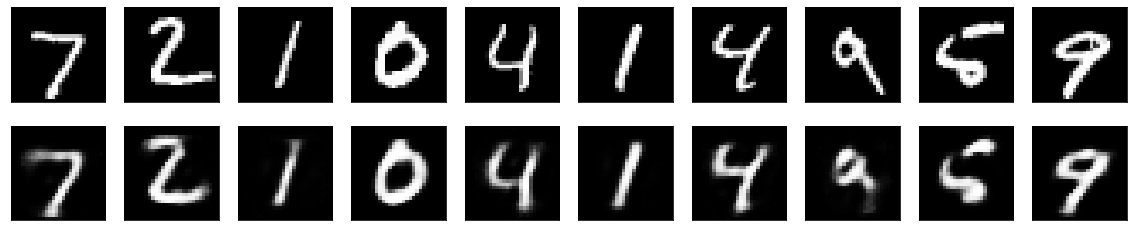

In [11]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()